In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
import math

% matplotlib inline

UsageError: Line magic function `%` not found.


In [252]:
#parameters
N = 10  #spins
W = np.random.randn(N,N)  #Wij
theta = 0  #threshold
rep = 10000  #length of simulation
spins = np.random.choice((-1,1),N)

In [253]:
#iterations
for r in range(0,rep):
    p = np.random.randint(0,N)
    h = np.sign(np.sum(W[p]*spins[p])-theta)
    spins[p] = h

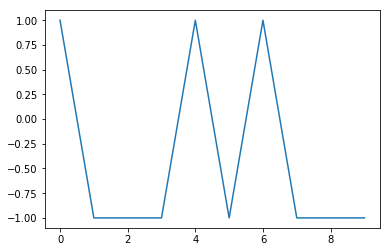

In [254]:
#lot spins
plt.plot(spins)

In [255]:
#memory and patterns
Wm = np.zeros((N,N))  #trained weights
K = 3  #patterns
ww = 1#/K  #normalization constant?
patterns = np.zeros((K,N))
for k in range(0,K):
    eps = np.expand_dims(np.random.choice((-1,1),N),axis=1)#np.expand_dims(np.array(inputs[k]),axis=1) #
    patterns[k,:] = np.squeeze(eps)
    lesson = eps.T*eps
    np.fill_diagonal(lesson,0)
    Wm = Wm + ww*lesson

In [256]:
#recall
# mu = 3
# theta = 0  #threshold
# rep = 50000  #length of simulation
# spins = np.random.randint(0,2,size=N)
# spins[spins==0] = -1
# for r in range(0,rep):
#     p = np.random.randint(0,N)
#     h = np.sign(np.sum(Wm[:,p]*spins[p])-theta)
#     if h==0:
#         temp = np.random.choice((-1,1))
#         spins[p] = temp
#     else:
#         spins[p] = h
#     #spins[p] = h

In [257]:
##recall
probes = 3
recalls = np.zeros((probes,N))
for p in range(0,probes):
    recall = np.random.choice((-1,1),size=N)
    res = Wm @ recall
    res = np.sign(res)
    recalls[p,:] = res

([], <a list of 0 Text yticklabel objects>)

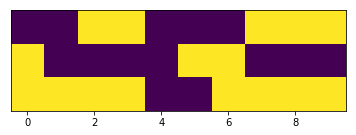

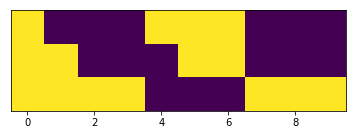

In [261]:
plt.imshow(patterns)
plt.yticks([])
plt.figure()
plt.imshow(recalls)
plt.yticks([])